<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_6_ASSIGNMENT_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design a multilayer ANN architecture according to the requirements shown below.

Train, test, save (.h5) and deploy the model to predict the housing price using Keras deep
learning library

2. (1 ponto) Calculate training and testing error metrics

3. (1 ponto) Build the application by loading the saved ANN model.
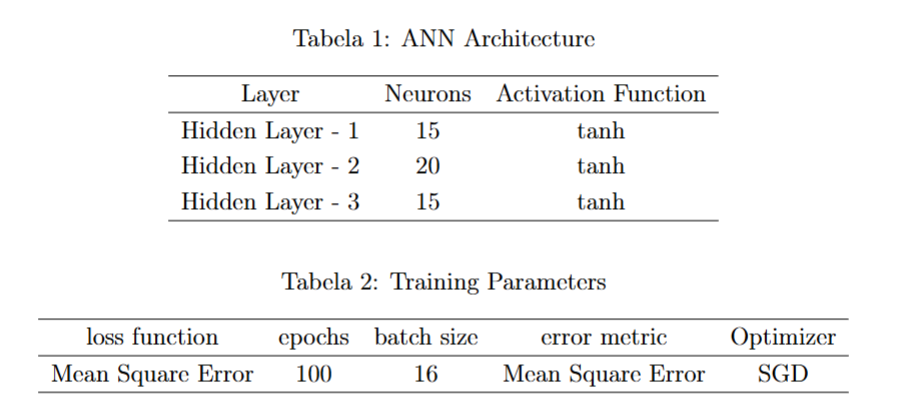

In [1]:
import numpy as np
def tanh(x):
    return np.tanh(x)
def tanh_deriv(x):
    return 1 - np.tanh(x)**2

def init_weights(layers):
    np.random.seed(1)
    w = [np.random.randn(layers[i], layers[i+1]) * 0.1 for i in range(len(layers)-1)]
    b = [np.random.randn(1, layers[i+1]) * 0.1 for i in range(len(layers)-1)]
    return w, b

def forward(X, w, b):
    a = [X]
    for i in range(len(w)-1):
        a.append(tanh(np.dot(a[-1], w[i]) + b[i]))
    a.append(np.dot(a[-1], w[-1]) + b[-1])
    return a

def backprop(X, y, w, b, lr):
    a = forward(X, w, b)
    err = y - a[-1]
    d = [err]
    for i in range(len(w)-1, 0, -1):
        d.append(np.dot(d[-1], w[i].T) * tanh_deriv(a[i]))
    d.reverse()

    for i in range(len(w)):
        w[i] += np.dot(a[i].T, d[i]) * lr
        b[i] += np.sum(d[i], axis=0, keepdims=True) * lr

def train(X, y, layers, lr=0.01, epochs=100):
    w, b = init_weights(layers)
    for _ in range(epochs):
        backprop(X, y, w, b, lr)
    return w, b

def predict(X, w, b):
    return forward(X, w, b)[-1]

def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

X_train = np.random.rand(100, 10)
y_train = np.random.rand(100, 1)

X_test = np.random.rand(20, 10)
y_test = np.random.rand(20, 1)

layers = [10, 15, 20, 15, 1]
w, b = train(X_train, y_train, layers, lr=0.01, epochs=100)

train_mse = mse(y_train, predict(X_train, w, b))
test_mse = mse(y_test, predict(X_test, w, b))

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

new_data = np.random.rand(1, 10)
predicted_price = predict(new_data, w, b)
print("Predicted Price:", predicted_price[0][0])

Train MSE: 0.08073844586705967
Test MSE: 0.07014805499299535
Predicted Price: 0.5186076393049863
